In [9]:
from PIL import Image
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image = Image.open('./adversarial/008_adv.png')

image.save('./adversarial/008_adv_compressed.png',"JPEG", quality=50)

In [21]:
def prepare_mask_and_masked(image, mask):
  image = np.array(image.convert("RGB"))
  image = image[None].transpose(0, 3, 1, 2)
  image = torch.from_numpy(image).to(dtype=torch.float32) / 127.5 - 1.0

  mask = ~np.array(mask.convert("L"))
  mask = mask.astype(np.float32) / 255.0
  mask = mask[None, None]
  mask[mask < 0.5] = 0
  mask[mask >= 0.5] = 1
  mask = torch.from_numpy(mask)
  masked_image = image * (mask < 0.5)

  return mask.squeeze(0).squeeze(0), masked_image.squeeze(0).permute(1, 2, 0)

In [9]:
image = Image.open('./images/001.png')

mask = Image.open('./images/001_masked.png')

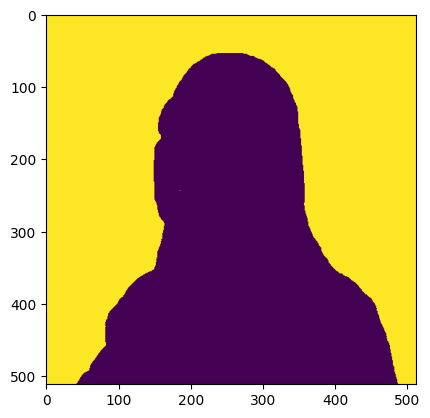

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


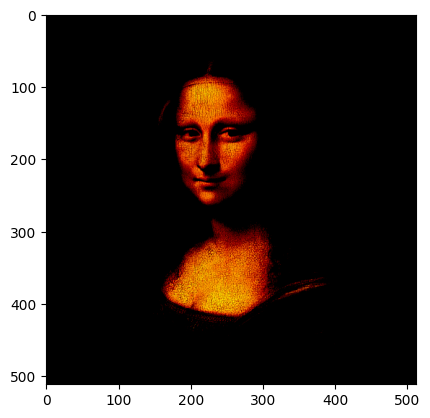

In [22]:
ms, mi = prepare_mask_and_masked(image, mask)


plt.imshow(ms)
plt.show()
plt.imshow(mi)
plt.show()